<a href="https://colab.research.google.com/github/Arbin17/DigitRecoginzer/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x,y = mnist['data'], mnist['target']

In [ ]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

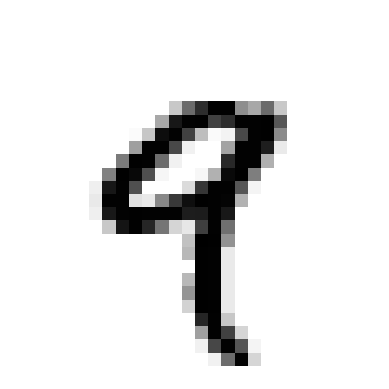

In [ ]:
import matplotlib.pyplot as plt
some_digit = x.iloc[4]
some_digit_image = some_digit.values.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(56000, 784)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['8', '4', '5', ..., '2', '7', '1'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.8695

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[1239    4   16    8    7   17   23    3   19    7]
 [   1 1520    7   12   13    4    6   11   22    4]
 [  21   20 1144   45   19   14   25   26   48   18]
 [  11    7   38 1205    9   61   12   25   31   34]
 [   9    3   11   11 1122   16   16   14   24   69]
 [  25   14   13   66   17 1038   25    6   44   25]
 [  23    9   10    5   22   26 1262    3   30    6]
 [   4   13   24   25   19    5    2 1360   17   34]
 [  12   14   37   56   30   45   23   13 1091   36]
 [   5    7   12   22   74   27    5   38   38 1192]]


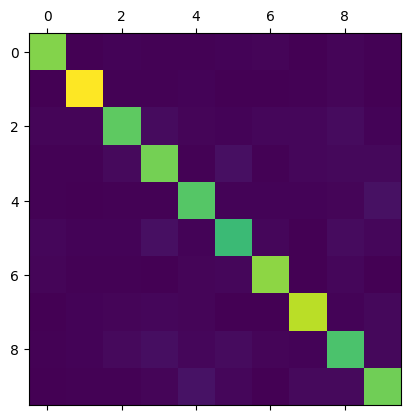

In [ ]:

plt.matshow(cm)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_pred

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [ ]:
print(accuracy_score(y_test, Y_pred))

0.9672857142857143


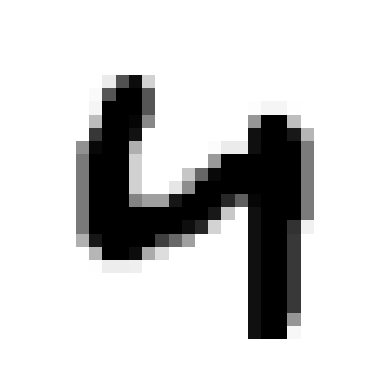

In [ ]:
other_digit = x.iloc[222]
other_digit_image = other_digit.values.reshape(28,28)

plt.imshow(other_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
clf.predict([other_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['4'], dtype=object)

In [ ]:
import cv2

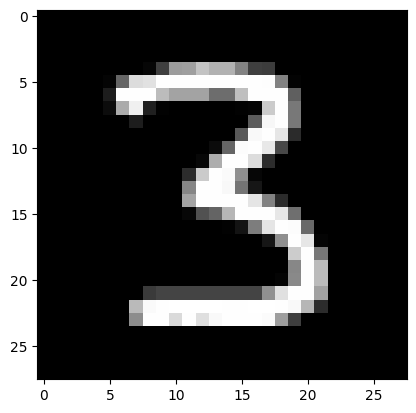

In [ ]:
image = cv2.imread('/content/0_kKxxK1YXSyWMEBtS.png')
resized_image = cv2.resize(image, (28,28))
plt.imshow(resized_image)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype=object)

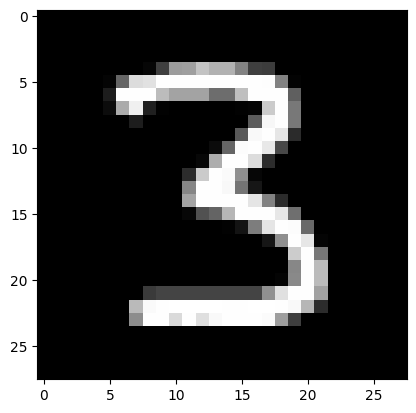

In [ ]:
# Convert the resized image to grayscale before flattening
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
clf.predict([gray_image.flatten()])